In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = {
    'Student_id' :[ 1,2,3,4,5,6,7,8,9,10],
    'math_score' :[-78,65,np.nan,90, 120, 35, 76, 90, 12, 35],
    'science_score' :[ 67, 42, 37, 98, np.nan, 87, 56, 78, 90, 100],
    'English_Score': [np.nan, 80, 75, 88, 60, 65, 85, 90, 95, 40],
    'Attendance_Rate': [0.95, 0.9, 0.8, 0.85, np.nan, -0.7, 0.88, 0.92, 1.2, 0.6]


}

In [7]:
df=pd.DataFrame(data)

In [9]:
df.describe()

,Student_id,math_score,science_score,English_Score,Attendance_Rate
count,10.00000,9.000000,9.000000,9.000000,9.000000
mean,5.50000,49.444444,72.777778,75.333333,0.711111
std,3.02765,58.391162,23.573172,17.564168,0.551667
min,1.00000,-78.000000,37.000000,40.000000,-0.700000
25%,3.25000,35.000000,56.000000,65.000000,0.800000
50%,5.50000,65.000000,78.000000,80.000000,0.880000
75%,7.75000,90.000000,90.000000,88.000000,0.920000
max,10.00000,120.000000,100.000000,95.000000,1.200000


In [11]:
df.head()

,Student_id,math_score,science_score,English_Score,Attendance_Rate
0,1,-78.0,67.0,NaN,0.95
1,2,65.0,42.0,80.0,0.90
2,3,NaN,37.0,75.0,0.80
3,4,90.0,98.0,88.0,0.85
4,5,120.0,NaN,60.0,NaN


In [13]:
print(df)

   Student_id  math_score  science_score  English_Score  Attendance_Rate
0           1       -78.0           67.0            NaN             0.95
1           2        65.0           42.0           80.0             0.90
2           3         NaN           37.0           75.0             0.80
3           4        90.0           98.0           88.0             0.85
4           5       120.0            NaN           60.0              NaN
5           6        35.0           87.0           65.0            -0.70
6           7        76.0           56.0           85.0             0.88
7           8        90.0           78.0           90.0             0.92
8           9        12.0           90.0           95.0             1.20
9          10        35.0          100.0           40.0             0.60


missing **values**

In [16]:
df.isnull().sum()

Student_id         0
math_score         1
science_score      1
English_Score      1
Attendance_Rate    1
dtype: int64

handling missing values and inconsistencies

In [20]:
df['math_score'].fillna(df['math_score'].mean(), inplace=True)

C:\Users\SARA\AppData\Local\Temp\ipykernel_14228\1778194172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math_score'].fillna(df['math_score'].mean(), inplace=True)


In [22]:
df['science_score'].fillna(df['science_score'].mean(), inplace= True)

C:\Users\SARA\AppData\Local\Temp\ipykernel_14228\2617506876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['science_score'].fillna(df['science_score'].mean(), inplace= True)


In [24]:
df['English_Score'].fillna(df['English_Score'].mean() ,inplace = True)

C:\Users\SARA\AppData\Local\Temp\ipykernel_14228\692469081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['English_Score'].fillna(df['English_Score'].mean() ,inplace = True)


In [26]:
df['Attendance_Rate'] = df['Attendance_Rate'].apply(lambda x: 1 if x > 1 else x)

In [28]:
print(df)

   Student_id  math_score  science_score  English_Score  Attendance_Rate
0           1  -78.000000      67.000000      75.333333             0.95
1           2   65.000000      42.000000      80.000000             0.90
2           3   49.444444      37.000000      75.000000             0.80
3           4   90.000000      98.000000      88.000000             0.85
4           5  120.000000      72.777778      60.000000              NaN
5           6   35.000000      87.000000      65.000000            -0.70
6           7   76.000000      56.000000      85.000000             0.88
7           8   90.000000      78.000000      90.000000             0.92
8           9   12.000000      90.000000      95.000000             1.00
9          10   35.000000     100.000000      40.000000             0.60


In [30]:
for col in ['math_score','science_score','English_Score', 'Attendance_Rate']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound, upper_bound = Q1 - 1.5 * IQR , Q3 + 1.5 * IQR
  outlier = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  print(" \ After removing outliers in ",col)
  print(outlier)

 \ After removing outliers in  math_score
   Student_id  math_score  science_score  English_Score  Attendance_Rate
1           2   65.000000      42.000000           80.0             0.90
2           3   49.444444      37.000000           75.0             0.80
3           4   90.000000      98.000000           88.0             0.85
4           5  120.000000      72.777778           60.0              NaN
5           6   35.000000      87.000000           65.0            -0.70
6           7   76.000000      56.000000           85.0             0.88
7           8   90.000000      78.000000           90.0             0.92
8           9   12.000000      90.000000           95.0             1.00
9          10   35.000000     100.000000           40.0             0.60
 \ After removing outliers in  science_score
   Student_id  math_score  science_score  English_Score  Attendance_Rate
0           1  -78.000000      67.000000      75.333333             0.95
1           2   65.000000      42.000

<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
C:\Users\SARA\AppData\Local\Temp\ipykernel_14228\1955004491.py:8: SyntaxWarning: invalid escape sequence '\ '
  print(" \ After removing outliers in ",col)


In [ ]:
df['math_score'].skew()

np.float64(-1.1830044235512214)

In [ ]:
df['math_score_log']= np.log(df['math_score'])

In [ ]:
df['math_score_log'].skew()

np.float64(-2.1630087731980425)

In [ ]:
print(df)

   Student_id  math_score  science_score  English_Score  Attendance_Rate  \
1           2    4.174387           42.0           80.0             0.90   
2           3    3.900850           37.0           75.0             0.80   
3           4    4.499810           98.0           88.0             0.85   
6           7    4.330733           56.0           85.0             0.88   
7           8    4.499810           78.0           90.0             0.92   
8           9    2.484907           90.0           95.0             1.00   

   math_score_log  
1        1.428968  
2        1.361194  
3        1.504035  
6        1.465737  
7        1.504035  
8        0.910235  


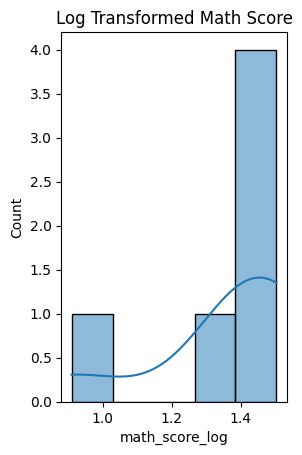

In [ ]:
import seaborn as sns
plt.subplot(1,2,2)
sns.histplot(df['math_score_log'], kde=True)
plt.title('Log Transformed Math Score')

plt.show()